In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

2022-06-16 11:37:01.230909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 11:37:01.230935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# !wget https://bioinf.nl/~davelangers/datasets/dog_cat.zip
# !unzip dog_cat.zip

In [3]:
# cat dog classifier
cdc = keras.models.Sequential()


cdc.add(keras.layers.InputLayer(input_shape=(126, 126, 3), name='Input'))  # 150x150 with 3 channels (color)

cdc.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='tanh'))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cdc.add(keras.layers.Conv2D(filters=48, kernel_size=(3,3), activation='tanh'))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cdc.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='tanh'))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cdc.add(keras.layers.Conv2D(filters=96, kernel_size=(3,3), activation='tanh'))
cdc.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cdc.add(keras.layers.Flatten())

cdc.add(keras.layers.Dense(units=64, activation='tanh'))
cdc.add(keras.layers.Dense(units=1, activation='sigmoid'))
# cdc.add(keras.layers.Dense(units=2, activation='softmax'))
            
cdc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        27712     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

2022-06-16 11:37:13.105204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-16 11:37:13.105253: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-16 11:37:13.105287: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nuc417.bin.bioinf.nl): /proc/driver/nvidia/version does not exist
2022-06-16 11:37:13.105681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
cdc.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=keras.metrics.BinaryAccuracy()
)

In [5]:
train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory='./dog_cat/train',
    batch_size=20,
    color_mode='rgb',
    target_size=(126, 126),
    class_mode='binary'
)
# can also flow from dataframe

Found 2000 images belonging to 2 classes.


In [6]:
for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype)
    print(y_train.shape, y_train.dtype)
    break

(20, 126, 126, 3) float32
(20,) float32


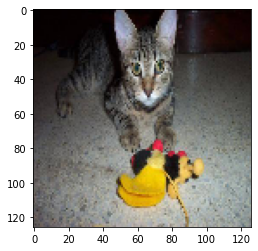

In [7]:
plt.imshow(x_train[3])
plt.show()

In [8]:
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = train_data.flow_from_directory(
    directory='./dog_cat/test',
    batch_size=20,
    color_mode='rgb',
    target_size=(126, 126),
    class_mode='binary'
)


Found 500 images belonging to 2 classes.


In [9]:
results = cdc.fit_generator(generator=train_generator,
                            epochs=10,
                            steps_per_epoch=100,
                            validation_data=test_generator,
                            validation_steps=25
                           )

results.history.keys()

Epoch 1/10


/tmp/ipykernel_7735/529201383.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = cdc.fit_generator(generator=train_generator,


100/100 [==============================] - 26s 256ms/step - loss: 0.6878 - binary_accuracy: 0.5740 - val_loss: 0.6307 - val_binary_accuracy: 0.6580
Epoch 2/10
100/100 [==============================] - 25s 250ms/step - loss: 0.6132 - binary_accuracy: 0.6620 - val_loss: 0.5852 - val_binary_accuracy: 0.6740
Epoch 3/10
100/100 [==============================] - 25s 251ms/step - loss: 0.5402 - binary_accuracy: 0.7410 - val_loss: 0.5661 - val_binary_accuracy: 0.7060
Epoch 4/10
100/100 [==============================] - 26s 263ms/step - loss: 0.4705 - binary_accuracy: 0.7730 - val_loss: 0.5641 - val_binary_accuracy: 0.7020
Epoch 5/10
100/100 [==============================] - 24s 244ms/step - loss: 0.3650 - binary_accuracy: 0.8465 - val_loss: 0.5791 - val_binary_accuracy: 0.7460
Epoch 6/10
100/100 [==============================] - 25s 247ms/step - loss: 0.2428 - binary_accuracy: 0.9010 - val_loss: 0.6271 - val_binary_accuracy: 0.7080
Epoch 7/10
100/100 [==============================] - 26s

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

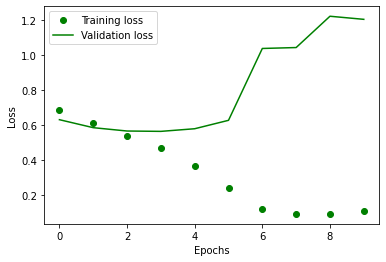

In [11]:
plt.plot(results.history['loss'], 'go', label='Training loss')
plt.plot(results.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

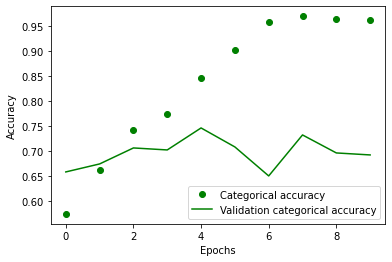

In [13]:
plt.plot(results.history['binary_accuracy'], 'go', label='Categorical accuracy')
plt.plot(results.history['val_binary_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# train_data = keras.preprocessing.image.ImageDataGenerator(
#     rescale=1/255,
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# test_generator = train_data.flow_from_directory(
#     directory='./dog_cat/test',
#     batch_size=20,
#     color_mode='rgb',
#     target_size=(126, 126),
#     class_mode='binary'
# )